In [13]:
import numpy as np

def criaDatasetBidimensionalBinárioInclinado(n=20, slop=[2, 1], intercept=0.4, dummy_features=3):
    """
    Cria um dataset bidimensional binário com
    algumas características inúteis.
    """
    X = np.random.uniform(size=(n,dummy_features+2))
    AUX = np.multiply(X[:,:2], slop)-[0, intercept]
    y = np.array(AUX[:,0]>AUX[:,1], dtype=int)*2-1
    return X, y

slop = [2, 1]
intercept = -0.4
dummy_features = 3
Xtr, ytr = criaDatasetBidimensionalBinárioInclinado(n=20, slop=slop, intercept=intercept, dummy_features=dummy_features)
Xtr, ytr

(array([[0.43820431, 0.69354344, 0.48102153, 0.72488922, 0.22473445],
        [0.37398299, 0.78466496, 0.65423003, 0.44006598, 0.89077767],
        [0.77992545, 0.96675252, 0.18141377, 0.48517025, 0.08203261],
        [0.2966676 , 0.55444492, 0.53374835, 0.38107237, 0.2373725 ],
        [0.28501876, 0.75484597, 0.01334277, 0.2660535 , 0.20921874],
        [0.07315829, 0.77251295, 0.74233116, 0.19661629, 0.02784854],
        [0.51549184, 0.21903185, 0.84728091, 0.99509146, 0.75485869],
        [0.11325823, 0.51220094, 0.55692135, 0.08785444, 0.27028824],
        [0.14652534, 0.6944016 , 0.7296944 , 0.83180641, 0.89372154],
        [0.19252386, 0.55388422, 0.93378257, 0.82324566, 0.53005688],
        [0.83299276, 0.4290223 , 0.23266386, 0.05067694, 0.84018566],
        [0.76638385, 0.10326319, 0.3862722 , 0.30829903, 0.99128642],
        [0.7196009 , 0.02352947, 0.78991331, 0.22284618, 0.92332946],
        [0.79628615, 0.51506637, 0.56075962, 0.16022363, 0.48361765],
        [0.20524747,

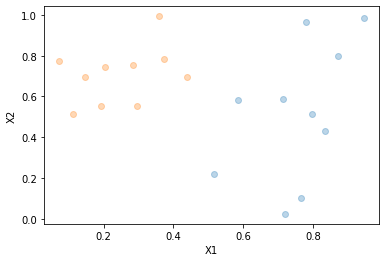

In [14]:
import matplotlib.pyplot as plt

def plotaDatasetBidimensional(X, y):
    """
    Plota um dataset bidimensional.
    """
    plt.xlabel('X1')
    plt.ylabel('X2')
    for k in set(y):
        plt.plot(X[:,0][y==k],X[:,1][y==k], "o", alpha=0.3)

plotaDatasetBidimensional(Xtr, ytr)

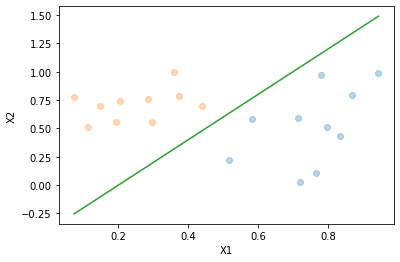

In [15]:
def plotaHiperplanoDatasetBidimensional(X, y, vetor, intercept=0):
    """
    Plota um dataset bidimensional com um hiperplano definido por um
    vetor e o valor em que este vetor intercepta o eixo vertical.
    """
    x0min = min(X[:,0])
    x0max = max(X[:,0])
    xs = np.linspace(x0min, x0max, num=2)
    ys = (-vetor[0] / vetor[1]) * xs - intercept / vetor[1]
    plt.plot(xs,ys)

plotaDatasetBidimensional(Xtr, ytr)
vetor_hyperplano = np.array(slop) * np.array([1, -1])
plotaHiperplanoDatasetBidimensional(Xtr, ytr, vetor_hyperplano, intercept)

In [16]:
def sign(a):
    return (a >= 0) * 2 - 1

In [17]:
def accuracy(yactual, ypred):
    return sum(yactual == ypred)/len(yactual)

In [18]:
from abc import ABC, abstractmethod

class TrainingAlgorithm(ABC):
    @abstractmethod
    def getW(self, X, y, activation):
        pass


class PseudoInversa(TrainingAlgorithm):
    def __init__(self, regularization=0):
        self.regularization = regularization
    def getW(self, X, y):
        return np.linalg.inv(X.T @ X + np.eye(X.shape[1])*self.regularization) @ X.T @ y


class DescidaGradiente(TrainingAlgorithm):
    def __init__(self, max_iter=250, learning_rate=0.02, regularization=0):
        self.max_iter = max_iter
        self.learning_rate = learning_rate
        self.regularization = regularization

    def getW(self, X, y):
        w = np.random.uniform(-1, 1, size=X.shape[1])
        for _ in range(self.max_iter):
            ypred = X @ w
            erros = y - ypred
            custo = sum(erros**2)
            if custo == 0:
                break
            w *= 1 - self.regularization * self.learning_rate
            w += (X.T @ erros) * self.learning_rate
        return w

1.0
[-1.28626611  3.20709802 -0.77817787  0.39547222 -0.06808927 -0.03497829]
12.70777690867918


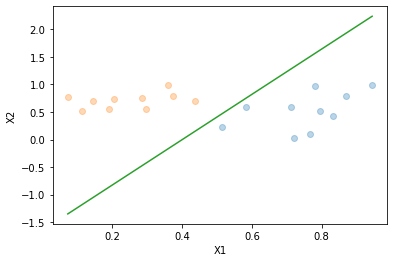

In [19]:
from sklearn.base import BaseEstimator, ClassifierMixin

class Perceptron(BaseEstimator, ClassifierMixin):
    """
    Versão Adaline do Perceptron com limite de iterações,
    treinado em batch, com bias e taxa de aprendizado.
    """
    def __init__(self, training_algorithm=DescidaGradiente()):
        self.w = None
        self.activation = sign
        self.training_algorithm = training_algorithm
    
    @staticmethod
    def includebias(X):
        bias = np.ones((X.shape[0],1))
        Xb = np.concatenate((bias,X), axis=1)
        return Xb

    def fit(self, X, y):
        Xb = Perceptron.includebias(X)
        self.w = self.training_algorithm.getW(Xb, y)
    
    def __pre_activation(self, X):
        Xb = Perceptron.includebias(X)
        return Xb @ self.w

    def predict(self, X):
        a = self.__pre_activation(X)
        ypred = self.activation(a)
        return ypred

perceptron = Perceptron()
perceptron.fit(Xtr, ytr)
print(accuracy(ytr, perceptron.predict(Xtr)))
print(perceptron.w)
plotaDatasetBidimensional(Xtr, ytr)
plotaHiperplanoDatasetBidimensional(Xtr, ytr, perceptron.w[1:], perceptron.w[0])
print(sum(perceptron.w**2))


In [20]:
Xte, yte = criaDatasetBidimensionalBinárioInclinado(n=1000, slop=slop, intercept=intercept, dummy_features=dummy_features)

0.917


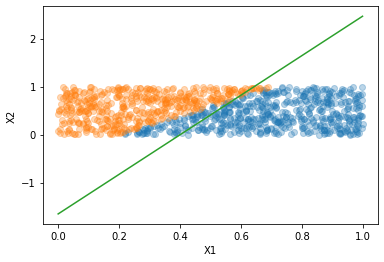

In [21]:
print(accuracy(yte, perceptron.predict(Xte)))
plotaDatasetBidimensional(Xte, yte)
plotaHiperplanoDatasetBidimensional(Xte, yte, perceptron.w[1:], perceptron.w[0])

1.0
[-0.4177614   1.71613446 -0.62117867 -0.19575024 -0.18918789  0.30439173]


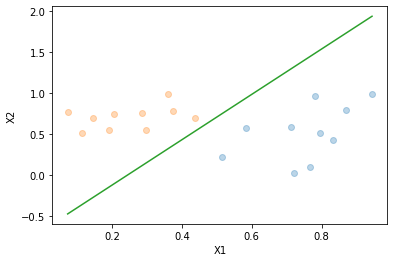

0.927
3.6722695598355126


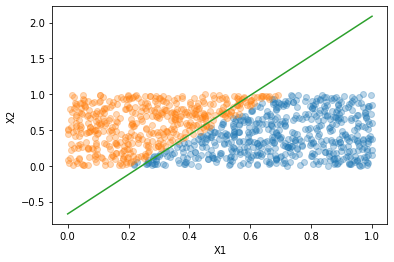

In [22]:
perceptron = Perceptron(training_algorithm=DescidaGradiente(regularization=1))
perceptron.fit(Xtr, ytr)
print(accuracy(ytr, perceptron.predict(Xtr)))
print(perceptron.w)
plotaDatasetBidimensional(Xtr, ytr)
plotaHiperplanoDatasetBidimensional(Xtr, ytr, perceptron.w[1:], perceptron.w[0])
plt.show()

print(accuracy(yte, perceptron.predict(Xte)))
plotaDatasetBidimensional(Xte, yte)
plotaHiperplanoDatasetBidimensional(Xte, yte, perceptron.w[1:], perceptron.w[0])
print(sum(perceptron.w**2))


In [23]:
perceptron = Perceptron(training_algorithm=DescidaGradiente(regularization=0))
perceptron.fit(Xtr, ytr)
print(accuracy(ytr, perceptron.predict(Xtr)), accuracy(yte, perceptron.predict(Xte)), perceptron.w)

perceptron = Perceptron(training_algorithm=DescidaGradiente(regularization=0.5))
perceptron.fit(Xtr, ytr)
print(accuracy(ytr, perceptron.predict(Xtr)), accuracy(yte, perceptron.predict(Xte)), perceptron.w)

perceptron = Perceptron(training_algorithm=DescidaGradiente(regularization=1))
perceptron.fit(Xtr, ytr)
print(accuracy(ytr, perceptron.predict(Xtr)), accuracy(yte, perceptron.predict(Xte)), perceptron.w)


1.0 0.92 [-1.24724565  3.21803847 -0.82747975  0.39519118 -0.05450184 -0.07429547]
1.0 0.939 [-0.62822841  2.19754823 -0.73353612 -0.08671653 -0.151113    0.2213028 ]
1.0 0.927 [-0.41741934  1.71611128 -0.6215103  -0.19582993 -0.18912837  0.30418075]


In [24]:
perceptron = Perceptron(training_algorithm=PseudoInversa(regularization=0))
perceptron.fit(Xtr, ytr)
print(accuracy(ytr, perceptron.predict(Xtr)), accuracy(yte, perceptron.predict(Xte)), perceptron.w)

perceptron = Perceptron(training_algorithm=PseudoInversa(regularization=0.5))
perceptron.fit(Xtr, ytr)
print(accuracy(ytr, perceptron.predict(Xtr)), accuracy(yte, perceptron.predict(Xte)), perceptron.w)

perceptron = Perceptron(training_algorithm=PseudoInversa(regularization=1))
perceptron.fit(Xtr, ytr)
print(accuracy(ytr, perceptron.predict(Xtr)), accuracy(yte, perceptron.predict(Xte)), perceptron.w)


1.0 0.879 [-1.7510548   3.50497742 -0.51345429  0.78654282 -0.16111093 -0.07547147]
1.0 0.936 [-0.65786896  2.21035379 -0.7122054  -0.06798709 -0.15724137  0.22623133]
1.0 0.927 [-0.4183732   1.71647814 -0.62079601 -0.19528574 -0.18930965  0.30439761]
